<a href="https://colab.research.google.com/github/chirag300/MLProject/blob/main/Regression_with_an_Insurance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The objectives of this challenge is to predict insurance premiums based on



Submissions are evaluated using the Root Mean Squared Logarithmic Error (RMSLE).



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
train = pd.read_csv('/content/train.csv')
train


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435230,435230,44.0,Female,2889.0,NaN,2.0,PhD,NaN,27.172789,Suburban,...,1.0,1.0,540.0,8.0,2020-02-23 15:21:39.244069,Poor,Yes,Weekly,House,2155.0
435231,435231,36.0,Female,93676.0,Divorced,NaN,Bachelor's,Unemployed,NaN,Suburban,...,0.0,12.0,491.0,8.0,2021-12-16 15:21:39.224915,Good,Yes,Weekly,House,1499.0
435232,435232,41.0,Female,142950.0,Married,1.0,PhD,Unemployed,25.837850,Urban,...,0.0,10.0,448.0,9.0,2021-02-21 15:21:39.106582,Average,Yes,Rarely,Condo,4016.0
435233,435233,31.0,Female,35411.0,Married,1.0,Bachelor's,Unemployed,18.556481,Urban,...,0.0,0.0,629.0,7.0,2021-08-16 15:21:39.237118,Average,Yes,Rarely,Condo,744.0


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435235 entries, 0 to 435234
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    435235 non-null  int64  
 1   Age                   428465 non-null  float64
 2   Gender                435235 non-null  object 
 3   Annual Income         418885 non-null  float64
 4   Marital Status        428523 non-null  object 
 5   Number of Dependents  395314 non-null  float64
 6   Education Level       435235 non-null  object 
 7   Occupation            305371 non-null  object 
 8   Health Score          408591 non-null  float64
 9   Location              435235 non-null  object 
 10  Policy Type           435234 non-null  object 
 11  Previous Claims       303138 non-null  float64
 12  Vehicle Age           435230 non-null  float64
 13  Credit Score          385029 non-null  float64
 14  Insurance Duration    435234 non-null  float64
 15  

In [35]:
train.isnull().sum()

,0
id,0
Age,6770
Gender,0
Annual Income,16350
Marital Status,6712
Number of Dependents,39921
Education Level,0
Occupation,129864
Health Score,26644
Location,0


In [36]:
# Calculate percentage of missing values
missing_percentage = (train.isnull().sum() / len(train)) * 100

# Print missing values and their percentages
print("Missing Values and Percentage of Total:")
print(missing_percentage)

Missing Values and Percentage of Total:
id                       0.000000
Age                      1.555482
Gender                   0.000000
Annual Income            3.756591
Marital Status           1.542155
Number of Dependents     9.172286
Education Level          0.000000
Occupation              29.837674
Health Score             6.121750
Location                 0.000000
Policy Type              0.000230
Previous Claims         30.350730
Vehicle Age              0.001149
Credit Score            11.535377
Insurance Duration       0.000230
Policy Start Date        0.000230
Customer Feedback        6.480867
Smoking Status           0.000230
Exercise Frequency       0.000230
Property Type            0.000230
Premium Amount           0.000230
dtype: float64


In [37]:
# Calculate the percentage of missing values
missing_percentage = (train.isnull().sum() / len(train)) * 100

# Columns with missing percentage less than 5%
columns_to_drop_rows = missing_percentage[missing_percentage < 5].index

# Drop rows with missing values in these columns
train_cleaned = train.dropna(subset=columns_to_drop_rows)

# Check the shape of the cleaned dataset
print(f"Original dataset shape: {train.shape}")
print(f"Cleaned dataset shape: {train_cleaned.shape}")

Original dataset shape: (435235, 21)
Cleaned dataset shape: (406112, 21)


In [38]:
train = train_cleaned
# Calculate percentage of missing values
missing_percentage = (train.isnull().sum() / len(train)) * 100

# Print missing values and their percentages
print("Missing Values and Percentage of Total:")
print(missing_percentage)

Missing Values and Percentage of Total:
id                       0.000000
Age                      0.000000
Gender                   0.000000
Annual Income            0.000000
Marital Status           0.000000
Number of Dependents     9.162251
Education Level          0.000000
Occupation              29.842753
Health Score             6.174898
Location                 0.000000
Policy Type              0.000000
Previous Claims         30.430768
Vehicle Age              0.000000
Credit Score            11.682738
Insurance Duration       0.000000
Policy Start Date        0.000000
Customer Feedback        6.366224
Smoking Status           0.000000
Exercise Frequency       0.000000
Property Type            0.000000
Premium Amount           0.000000
dtype: float64


In [39]:
# Convert the 'Policy Start Date' column to datetime format
train['Policy Start Date'] = pd.to_datetime(train['Policy Start Date'])

# Extract year, month, and day into separate columns
train['Policy Start Year'] = train['Policy Start Date'].dt.year
train['Policy Start Month'] = train['Policy Start Date'].dt.month
train['Policy Start Day'] = train['Policy Start Date'].dt.day

# Drop the original 'Policy Start Date' column
train = train.drop(columns=['Policy Start Date'])

# Display the updated DataFrame



<ipython-input-39-d2413d8371b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Policy Start Date'] = pd.to_datetime(train['Policy Start Date'])
<ipython-input-39-d2413d8371b5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Policy Start Year'] = train['Policy Start Date'].dt.year
<ipython-input-39-d2413d8371b5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [40]:
train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy Start Year,Policy Start Month,Policy Start Day
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,372.0,5.0,Poor,No,Weekly,House,2869.0,2023,12,23
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,694.0,2.0,Average,Yes,Monthly,House,1483.0,2023,6,12
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,NaN,3.0,Good,Yes,Weekly,House,567.0,2023,9,30
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,367.0,1.0,Poor,Yes,Daily,Apartment,765.0,2024,6,12
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,598.0,4.0,Poor,Yes,Weekly,House,2022.0,2021,12,1


In [41]:
from sklearn.preprocessing import StandardScaler

# Convert 'Policy Start Year', 'Policy Start Month', and 'Policy Start Day' to float64
train['Policy Start Year'] = train['Policy Start Year'].astype('float64')
train['Policy Start Month'] = train['Policy Start Month'].astype('float64')
train['Policy Start Day'] = train['Policy Start Day'].astype('float64')

# Separate numerical and categorical data
numerical_data = train.select_dtypes(include=['float64'])
categorical_data = train.select_dtypes(exclude=['float64'])

# Display results
print("Numerical Columns:")
print(numerical_data.columns)

print("\nCategorical Columns:")
print(categorical_data.columns)




Numerical Columns:
Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount', 'Policy Start Year', 'Policy Start Month',
       'Policy Start Day'],
      dtype='object')

Categorical Columns:
Index(['id', 'Gender', 'Marital Status', 'Education Level', 'Occupation',
       'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object')


In [42]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming `categorical_data` is already extracted from `train`

encoded_data = categorical_data.copy()

# Label Encoding for all categorical columns
label_encoders = {}
for col in categorical_data.columns:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(categorical_data[col].astype(str))  # Ensure all are strings
    label_encoders[col] = le  # Store the encoder for future use

# Add label-encoded data to the original 'train' DataFrame
train_encoded = pd.concat([train, encoded_data], axis=1)


# Drop the original categorical columns from the train DataFrame
train_dropped = train.drop(columns=categorical_data.columns)

# Add the label-encoded data to the train DataFrame
train_encoded = pd.concat([train_dropped, encoded_data], axis=1)


In [43]:
train = train_encoded
train

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Year,...,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.0,5.0,2869.0,2023.0,...,0,1,0,1,2,2,2,0,3,2
1,39.0,31678.0,3.0,15.569731,1.0,12.0,694.0,2.0,1483.0,2023.0,...,0,0,2,3,0,1,0,1,1,2
2,23.0,25602.0,3.0,47.177549,1.0,14.0,NaN,3.0,567.0,2023.0,...,1,0,1,1,1,2,1,1,3,2
3,21.0,141855.0,2.0,10.938144,1.0,0.0,367.0,1.0,765.0,2024.0,...,1,1,0,3,0,0,2,1,0,0
4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.0,4.0,2022.0,2021.0,...,1,2,0,1,0,2,2,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435228,47.0,23404.0,0.0,42.764808,NaN,16.0,707.0,5.0,1650.0,2021.0,...,0,2,0,2,0,1,0,0,3,1
435229,28.0,61281.0,0.0,16.441042,1.0,12.0,667.0,3.0,2332.0,2022.0,...,0,1,2,3,1,2,3,0,2,2
435231,36.0,93676.0,NaN,NaN,0.0,12.0,491.0,8.0,1499.0,2021.0,...,0,0,0,2,1,2,1,1,3,2
435232,41.0,142950.0,1.0,25.837850,0.0,10.0,448.0,9.0,4016.0,2021.0,...,0,1,3,2,2,1,0,1,2,1


In [44]:
# Enable IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create the iterative imputer object
iterative_imputer = IterativeImputer(max_iter=10, random_state=42)

# Fit and transform the data
train_imputed_iterative = iterative_imputer.fit_transform(train)

# Convert the result back to a DataFrame
train_imputed_iterative_df = pd.DataFrame(train_imputed_iterative, columns=train.columns)

# Display the imputed data



In [45]:
train = train_imputed_iterative_df
train

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Year,...,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,19.0,10049.0,1.000000,22.598761,2.000000,17.0,372.00000,5.0,2869.0,2023.0,...,0.0,1.0,0.0,1.0,2.0,2.0,2.0,0.0,3.0,2.0
1,39.0,31678.0,3.000000,15.569731,1.000000,12.0,694.00000,2.0,1483.0,2023.0,...,0.0,0.0,2.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0
2,23.0,25602.0,3.000000,47.177549,1.000000,14.0,608.40558,3.0,567.0,2023.0,...,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0
3,21.0,141855.0,2.000000,10.938144,1.000000,0.0,367.00000,1.0,765.0,2024.0,...,1.0,1.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0
4,21.0,39651.0,1.000000,20.376094,0.000000,8.0,598.00000,4.0,2022.0,2021.0,...,1.0,2.0,0.0,1.0,0.0,2.0,2.0,1.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406107,47.0,23404.0,0.000000,42.764808,1.045319,16.0,707.00000,5.0,1650.0,2021.0,...,0.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,3.0,1.0
406108,28.0,61281.0,0.000000,16.441042,1.000000,12.0,667.00000,3.0,2332.0,2022.0,...,0.0,1.0,2.0,3.0,1.0,2.0,3.0,0.0,2.0,2.0
406109,36.0,93676.0,2.021293,26.206968,0.000000,12.0,491.00000,8.0,1499.0,2021.0,...,0.0,0.0,0.0,2.0,1.0,2.0,1.0,1.0,3.0,2.0
406110,41.0,142950.0,1.000000,25.837850,0.000000,10.0,448.00000,9.0,4016.0,2021.0,...,0.0,1.0,3.0,2.0,2.0,1.0,0.0,1.0,2.0,1.0


In [46]:
from sklearn.preprocessing import StandardScaler

# Define numerical and categorical columns explicitly
numerical_columns = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
                     'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
                      'Policy Start Year', 'Policy Start Month',
                     'Policy Start Day']
categorical_columns = ['id', 'Gender', 'Marital Status', 'Education Level', 'Occupation',
                       'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status',
                       'Exercise Frequency', 'Property Type']

# Separate numerical and categorical data
numerical_data = train[numerical_columns]
categorical_data = train[categorical_columns]

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to numerical columns
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Convert scaled numerical data back to DataFrame
numerical_data_scaled_df = pd.DataFrame(numerical_data_scaled, columns=numerical_columns, index=train.index)

# Combine scaled numerical and unscaled categorical data
train_preprocessed = pd.concat([numerical_data_scaled_df, categorical_data, train['Premium Amount']], axis=1)

# Display the final preprocessed DataFrame
print("\nPreprocessed Data:")
print(train_preprocessed.head())

# Optionally overwrite `train` with preprocessed data
train = train_preprocessed



Preprocessed Data:
        Age  Annual Income  Number of Dependents  Health Score  \
0 -1.636351      -0.704327             -0.748781     -0.250608   
1 -0.158989      -0.029790              0.734446     -0.847722   
2 -1.340878      -0.219281              0.734446      1.837351   
3 -1.488614       3.406262             -0.007168     -1.241174   
4 -1.488614       0.218861             -0.748781     -0.439423   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0         1.227324     1.284345     -1.600647           -0.006540   
1         0.004408     0.418346      0.695208           -1.162899   
2         0.004408     0.764746      0.084921           -0.777446   
3         0.004408    -1.660050     -1.636297           -1.548352   
4        -1.218508    -0.274453      0.010729           -0.391993   

   Policy Start Year  Policy Start Month  ...  Marital Status  \
0           0.933126            1.602801  ...             1.0   
1           0.933126           -0.1439

In [47]:
train

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Year,Policy Start Month,...,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,-1.636351,-0.704327,-0.748781,-0.250608,1.227324,1.284345,-1.600647,-0.006540,0.933126,1.602801,...,1.0,0.0,1.0,2.0,2.0,2.0,0.0,3.0,2.0,2869.0
1,-0.158989,-0.029790,0.734446,-0.847722,0.004408,0.418346,0.695208,-1.162899,0.933126,-0.143944,...,0.0,2.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,1483.0
2,-1.340878,-0.219281,0.734446,1.837351,0.004408,0.764746,0.084921,-0.777446,0.933126,0.729428,...,0.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,567.0
3,-1.488614,3.406262,-0.007168,-1.241174,0.004408,-1.660050,-1.636297,-1.548352,1.611140,-0.143944,...,1.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,765.0
4,-1.488614,0.218861,-0.748781,-0.439423,-1.218508,-0.274453,0.010729,-0.391993,-0.422900,1.602801,...,2.0,0.0,1.0,0.0,2.0,2.0,1.0,3.0,2.0,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406107,0.431956,-0.287829,-1.490395,1.462490,0.059830,1.111145,0.787898,-0.006540,-0.422900,-0.143944,...,2.0,0.0,2.0,0.0,1.0,0.0,0.0,3.0,1.0,1650.0
406108,-0.971538,0.893428,-1.490395,-0.773704,0.004408,0.418346,0.502698,-0.777446,0.255113,0.147180,...,1.0,2.0,3.0,1.0,2.0,3.0,0.0,2.0,2.0,2332.0
406109,-0.380593,1.903720,0.008624,0.055908,-1.218508,0.418346,-0.752179,1.149820,-0.422900,1.602801,...,0.0,0.0,2.0,1.0,2.0,1.0,1.0,3.0,2.0,1499.0
406110,-0.011253,3.440412,-0.748781,0.024551,-1.218508,0.071947,-1.058768,1.535273,-0.422900,-1.308441,...,1.0,3.0,2.0,2.0,1.0,0.0,1.0,2.0,1.0,4016.0


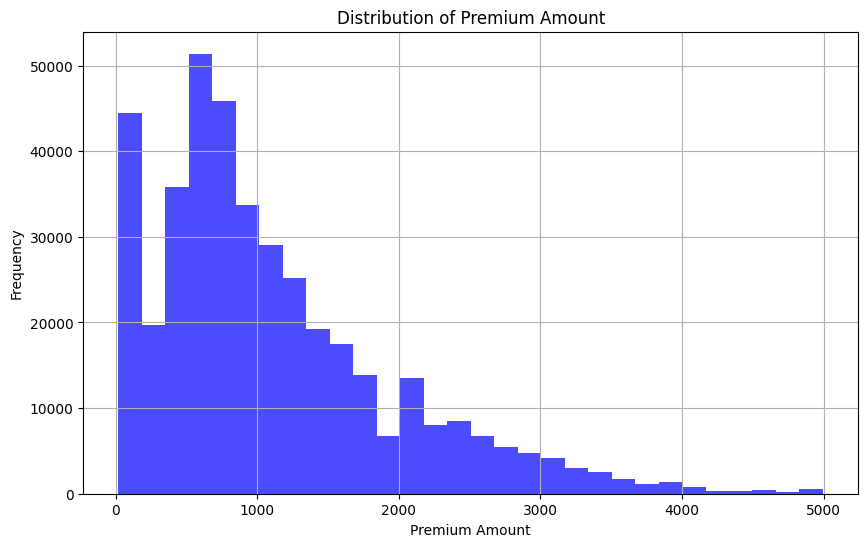

In [48]:
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame and 'Premium Amount' is the target column
plt.figure(figsize=(10,6))
plt.hist(train['Premium Amount'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Premium Amount')
plt.xlabel('Premium Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
# Prepare data (assuming the data is already preprocessed)
X = train.drop(columns=['Premium Amount'])
y = train['Premium Amount']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Minimum value in y_test:", y_test.min())
print("Minimum value in y_test:", y_train.min())


Minimum value in y_test: 20.0
Minimum value in y_test: 20.0


In [50]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb


In [51]:
train = train.drop(columns=['id'])


In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

# Function to calculate RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Prepare data
X = train.drop(columns=['Premium Amount'])
y = train['Premium Amount']

# Sampling 10% of the data to reduce time
X_sampled, _, y_sampled, _ = train_test_split(X, y, train_size=0.1, random_state=42)

# Split the sampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Standardize the data (important for some models like SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality (optional)
pca = PCA(n_components=50)  # Adjust number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
    'XGBoost Regressor': xgb.XGBRegressor(n_jobs=-1)  # Using multiple cores
}

# Initialize a dictionary to store the results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train_pca, y_train)

    # Make predictions
    y_pred = model.predict(X_test_pca)

    # Calculate RMSLE
    rmsle_score = rmsle(y_test, y_pred)

    # Store results
    results[name] = {'RMSLE': rmsle_score}

# Display results
results_df = pd.DataFrame(results).T
print("Model Comparison Results (RMSLE):")
print(results_df)


ValueError: n_components=50 must be between 0 and min(n_samples, n_features)=21 with svd_solver='covariance_eigh'

In [62]:
train

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Year,Policy Start Month,...,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,-1.636351,-0.704327,-0.748781,-0.250608,1.227324,1.284345,-1.600647,-0.006540,0.933126,1.602801,...,1.0,0.0,1.0,2.0,2.0,2.0,0.0,3.0,2.0,2869.0
1,-0.158989,-0.029790,0.734446,-0.847722,0.004408,0.418346,0.695208,-1.162899,0.933126,-0.143944,...,0.0,2.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,1483.0
2,-1.340878,-0.219281,0.734446,1.837351,0.004408,0.764746,0.084921,-0.777446,0.933126,0.729428,...,0.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,567.0
3,-1.488614,3.406262,-0.007168,-1.241174,0.004408,-1.660050,-1.636297,-1.548352,1.611140,-0.143944,...,1.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,765.0
4,-1.488614,0.218861,-0.748781,-0.439423,-1.218508,-0.274453,0.010729,-0.391993,-0.422900,1.602801,...,2.0,0.0,1.0,0.0,2.0,2.0,1.0,3.0,2.0,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406107,0.431956,-0.287829,-1.490395,1.462490,0.059830,1.111145,0.787898,-0.006540,-0.422900,-0.143944,...,2.0,0.0,2.0,0.0,1.0,0.0,0.0,3.0,1.0,1650.0
406108,-0.971538,0.893428,-1.490395,-0.773704,0.004408,0.418346,0.502698,-0.777446,0.255113,0.147180,...,1.0,2.0,3.0,1.0,2.0,3.0,0.0,2.0,2.0,2332.0
406109,-0.380593,1.903720,0.008624,0.055908,-1.218508,0.418346,-0.752179,1.149820,-0.422900,1.602801,...,0.0,0.0,2.0,1.0,2.0,1.0,1.0,3.0,2.0,1499.0
406110,-0.011253,3.440412,-0.748781,0.024551,-1.218508,0.071947,-1.058768,1.535273,-0.422900,-1.308441,...,1.0,3.0,2.0,2.0,1.0,0.0,1.0,2.0,1.0,4016.0


In [52]:

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

# Prepare data (assuming the data is already preprocessed)
X = train.drop(columns=['Premium Amount'])
y = train['Premium Amount']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data

X_train_scaled = X_train
X_test_scaled = X_test

# Define a custom MSLE metric for tracking
def msle(y_true, y_pred):
    return K.sqrt(K.mean(K.square(K.log(y_pred + 1) - K.log(y_true + 1))))

model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # Increased neurons
    Dropout(0.2),  # Prevent overfitting
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model with MSLE as a metric
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[msle])

# Train the model (reduced epochs and larger batch size)
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=128, verbose=1)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate RMSLE (final evaluation)
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rmsle_score = rmsle(y_test, y_pred)

print("RMSLE score with Deep Learning:", rmsle_score)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2539/2539 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 874675.1250 - msle: 1.4335
Epoch 2/10
2539/2539 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 746733.0000 - msle: 1.1445
Epoch 3/10
2539/2539 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 748357.0000 - msle: 1.1503
Epoch 4/10
2539/2539 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 746384.3750 - msle: 1.1490
Epoch 5/10
2539/2539 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 747359.1250 - msle: 1.1518
Epoch 6/10
2539/2539 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 746870.0000 - msle: 1.1510
Epoch 7/10
2539/2539 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 747521.5625 - msle: 1.1496
Epoch 8/10
2539/2539 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 738262.2500 - msle: 1.1454
Epoch 9/10
2539/2539 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 738138.8125 - msle: 1.1475
Epoch 10/10
2539/2539 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 742477.4375 - msle: 1.1476
2539/2539 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
RMSLE score with Deep Learning: 1.1536570819752228


In [53]:
test = pd.read_csv('/content/test.csv')
test


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,1999995,50.0,Female,38782.0,Married,1.0,Bachelor's,NaN,14.498639,Rural,Premium,NaN,8.0,309.0,2.0,2021-07-09 15:21:39.184157,Average,Yes,Daily,Condo
799996,1999996,NaN,Female,73462.0,Single,0.0,Master's,NaN,8.145748,Rural,Basic,2.0,0.0,NaN,2.0,2023-03-28 15:21:39.250151,Good,No,Daily,Apartment
799997,1999997,26.0,Female,35178.0,Single,0.0,Master's,Employed,6.636583,Urban,Comprehensive,NaN,10.0,NaN,6.0,2019-09-30 15:21:39.132191,Poor,No,Monthly,Apartment
799998,1999998,34.0,Female,45661.0,Single,3.0,Master's,NaN,15.937248,Urban,Premium,2.0,17.0,467.0,7.0,2022-05-09 15:21:39.253660,Average,No,Weekly,Condo


In [54]:
# Calculate percentage of missing values
missing_percentage = (test.isnull().sum() / len(test)) * 100

# Print missing values and their percentages
print("Missing Values and Percentage of Total:")
print(missing_percentage)

Missing Values and Percentage of Total:
id                       0.000000
Age                      1.561125
Gender                   0.000000
Annual Income            3.732500
Marital Status           1.542000
Number of Dependents     9.141250
Education Level          0.000000
Occupation              29.890625
Health Score             6.181125
Location                 0.000000
Policy Type              0.000000
Previous Claims         30.350250
Vehicle Age              0.000375
Credit Score            11.431375
Insurance Duration       0.000250
Policy Start Date        0.000000
Customer Feedback        6.534500
Smoking Status           0.000000
Exercise Frequency       0.000000
Property Type            0.000000
dtype: float64


In [55]:
# Convert the 'Policy Start Date' column to datetime format
test['Policy Start Date'] = pd.to_datetime(test['Policy Start Date'])

# Extract year, month, and day into separate columns
test['Policy Start Year'] = test['Policy Start Date'].dt.year
test['Policy Start Month'] = test['Policy Start Date'].dt.month
test['Policy Start Day'] = test['Policy Start Date'].dt.day

# Drop the original 'Policy Start Date' column
test = test.drop(columns=['Policy Start Date'])

In [56]:
# Convert the 'Policy Start Year', 'Policy Start Month', and 'Policy Start Day' columns to integers
test['Policy Start Year'] = test['Policy Start Year'].astype('int64')
test['Policy Start Month'] = test['Policy Start Month'].astype('int64')
test['Policy Start Day'] = test['Policy Start Day'].astype('int64')


# Separate numerical columns
numerical_data = test.select_dtypes(include=['int64', 'float64'])

# Separate categorical columns
categorical_data = test.select_dtypes(exclude=['int64', 'float64'])

# Display results
print("Numerical Columns:")
print(numerical_data.columns)

print("\nCategorical Columns:")
print(categorical_data.columns)

Numerical Columns:
Index(['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Policy Start Year', 'Policy Start Month', 'Policy Start Day'],
      dtype='object')

Categorical Columns:
Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object')


In [57]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming `categorical_data` is already extracted from `train`

encoded_data = categorical_data.copy()

# Label Encoding for all categorical columns
label_encoders = {}
for col in categorical_data.columns:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(categorical_data[col].astype(str))  # Ensure all are strings
    label_encoders[col] = le  # Store the encoder for future use

# Add label-encoded data to the original 'train' DataFrame
train_encoded = pd.concat([test, encoded_data], axis=1)


# Drop the original categorical columns from the train DataFrame
train_dropped = test.drop(columns=categorical_data.columns)

# Add the label-encoded data to the train DataFrame
test = pd.concat([train_dropped, encoded_data], axis=1)


In [58]:
test

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Year,...,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,2310.0,4.0,7.657981,NaN,19.0,NaN,1.0,2023,...,0,3,0,1,0,0,2,1,3,2
1,1200001,31.0,126031.0,2.0,13.381379,NaN,14.0,372.0,8.0,2024,...,0,1,2,1,1,2,1,1,2,0
2,1200002,47.0,17092.0,0.0,24.354527,NaN,16.0,819.0,9.0,2023,...,0,0,3,2,2,1,0,1,1,1
3,1200003,28.0,30424.0,3.0,5.136225,1.0,3.0,770.0,5.0,2023,...,0,0,3,1,1,1,2,1,0,2
4,1200004,24.0,10863.0,2.0,11.844155,NaN,14.0,755.0,7.0,2021,...,1,0,1,2,1,2,0,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,1999995,50.0,38782.0,1.0,14.498639,NaN,8.0,309.0,2.0,2021,...,0,1,0,3,0,2,0,1,0,1
799996,1999996,NaN,73462.0,0.0,8.145748,2.0,0.0,NaN,2.0,2023,...,0,2,2,3,0,0,1,0,0,0
799997,1999997,26.0,35178.0,0.0,6.636583,NaN,10.0,NaN,6.0,2019,...,0,2,2,0,2,1,2,0,1,0
799998,1999998,34.0,45661.0,3.0,15.937248,2.0,17.0,467.0,7.0,2022,...,0,2,2,3,2,2,0,0,3,1


In [59]:
# Enable IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create the iterative imputer object
iterative_imputer = IterativeImputer(max_iter=10, random_state=42)

# Fit and transform the data
train_imputed_iterative = iterative_imputer.fit_transform(test)

# Convert the result back to a DataFrame
train_imputed_iterative_df = pd.DataFrame(train_imputed_iterative, columns=test.columns)

# Display the imputed data



In [60]:
test = train_imputed_iterative_df
test

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Year,...,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000.0,28.000000,2310.0,4.0,7.657981,0.950597,19.0,620.218555,1.0,2023.0,...,0.0,3.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,2.0
1,1200001.0,31.000000,126031.0,2.0,13.381379,1.080855,14.0,372.000000,8.0,2024.0,...,0.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0
2,1200002.0,47.000000,17092.0,0.0,24.354527,1.064230,16.0,819.000000,9.0,2023.0,...,0.0,0.0,3.0,2.0,2.0,1.0,0.0,1.0,1.0,1.0
3,1200003.0,28.000000,30424.0,3.0,5.136225,1.000000,3.0,770.000000,5.0,2023.0,...,0.0,0.0,3.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0
4,1200004.0,24.000000,10863.0,2.0,11.844155,1.023192,14.0,755.000000,7.0,2021.0,...,1.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,1999995.0,50.000000,38782.0,1.0,14.498639,0.899975,8.0,309.000000,2.0,2021.0,...,0.0,1.0,0.0,3.0,0.0,2.0,0.0,1.0,0.0,1.0
799996,1999996.0,41.125446,73462.0,0.0,8.145748,2.000000,0.0,558.449583,2.0,2023.0,...,0.0,2.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0
799997,1999997.0,26.000000,35178.0,0.0,6.636583,1.009606,10.0,590.908815,6.0,2019.0,...,0.0,2.0,2.0,0.0,2.0,1.0,2.0,0.0,1.0,0.0
799998,1999998.0,34.000000,45661.0,3.0,15.937248,2.000000,17.0,467.000000,7.0,2022.0,...,0.0,2.0,2.0,3.0,2.0,2.0,0.0,0.0,3.0,1.0


In [68]:
# Store the ID column and remove it from the test dataset
id_column = test['id']
test_data_without_id = test.drop(columns=['id'])

# Separate numerical and categorical columns
numerical_columns = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
                     'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
                     'Policy Start Year', 'Policy Start Month', 'Policy Start Day']

categorical_columns = ['Gender', 'Marital Status', 'Education Level', 'Occupation',
                       'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status',
                       'Exercise Frequency', 'Property Type']

# Check for missing columns
missing_numerical_columns = [col for col in numerical_columns if col not in test.columns]
missing_categorical_columns = [col for col in categorical_columns if col not in test.columns]

if missing_numerical_columns:
    print(f"Missing numerical columns: {missing_numerical_columns}")
if missing_categorical_columns:
    print(f"Missing categorical columns: {missing_categorical_columns}")

# Ensure the test dataset is preprocessed similarly to training
numerical_data = test[numerical_columns]
categorical_data = test[categorical_columns]

# Apply the same scaler instance used during training
numerical_data_scaled = scaler.transform(numerical_data)

# Convert scaled numerical data back to DataFrame
numerical_data_scaled_df = pd.DataFrame(numerical_data_scaled, columns=numerical_columns, index=test.index)

# Handle categorical data (assuming it's already encoded; if not, apply encoding)
# Example: Label Encoding or OneHotEncoding if required
# categorical_data_encoded = encoder.transform(categorical_data)

# Combine scaled numerical and categorical data (unencoded for now)
test_preprocessed = pd.concat([numerical_data_scaled_df, categorical_data], axis=1)

# Generate predictions using the trained model
predicted_premium_amounts = model.predict(test_preprocessed).flatten()

# Add predictions and the ID column back to the test dataset
final_output = pd.DataFrame({
    'ID': id_column.astype('int32'),
    'Premium Amount': predicted_premium_amounts.round(1)  # Round to 1 decimal place
})

# Save the final DataFrame to a CSV file
output_filename = 'final_premium_predictions.csv'
final_output.to_csv(output_filename, index=False)

print(f"CSV file '{output_filename}' has been created.")


25000/25000 ━━━━━━━━━━━━━━━━━━━━ 97s 4ms/step
CSV file 'final_premium_predictions.csv' has been created.
